In [77]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [78]:
data = keras.datasets.fashion_mnist

In [79]:
(X_train, y_train), (X_test, y_test) = data.load_data()

X_train = X_train/255.0
X_test = X_test/255.0

In [80]:
print(X_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


In [59]:
y_train = np.resize(y_data,(-1,1))

In [81]:
y_labels = np.unique(y_train, return_counts=False)
print(y_labels)

[0 1 2 3 4 5 6 7 8 9]


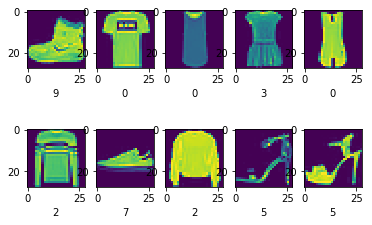

In [82]:
for i in range(10):
    
    plt.subplot(2,5,i+1)
    plt.imshow(X_train[i])
    plt.xlabel(y_train[i])

plt.show()

In [83]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [86]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [87]:
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
60000/60000 [==============================] - 3s 45us/sample - loss: 0.4988 - acc: 0.8245
Epoch 2/10
60000/60000 [==============================] - 2s 36us/sample - loss: 0.3742 - acc: 0.8651
Epoch 3/10
60000/60000 [==============================] - 2s 34us/sample - loss: 0.3383 - acc: 0.8761
Epoch 4/10
60000/60000 [==============================] - 2s 35us/sample - loss: 0.3132 - acc: 0.8850
Epoch 5/10
60000/60000 [==============================] - 2s 35us/sample - loss: 0.2942 - acc: 0.8911
Epoch 6/10
60000/60000 [==============================] - 2s 35us/sample - loss: 0.2810 - acc: 0.8960
Epoch 7/10
60000/60000 [==============================] - 2s 38us/sample - loss: 0.2680 - acc: 0.9011
Epoch 8/10
60000/60000 [==============================] - 2s 36us/sample - loss: 0.2547 - acc: 0.9064
Epoch 9/10
60000/60000 [==============================] - 2s 37us/sample - loss: 0.2465 - acc: 0.9076
Epoch 10/10
60000/60000 [==============================] - 2s 36us/sample - loss: 

In [88]:
test_loss, test_acc = model.evaluate(X_test,y_test,verbose=2)

10000/10000 - 0s - loss: 0.3459 - acc: 0.8826


In [89]:
predictions = model.predict(X_test)

In [90]:
predictions[0]

array([7.1818913e-06, 5.1623479e-09, 4.5929259e-08, 7.5744122e-10,
       3.1798617e-08, 1.3825232e-02, 1.8454667e-08, 2.2474293e-02,
       6.3575590e-07, 9.6369255e-01], dtype=float32)

In [91]:
print(np.argmax(predictions[0]))

9


In [92]:
y_test[0]

9

In [96]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [101]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label[i]].set_color('blue')


TypeError: only integer scalar arrays can be converted to a scalar index

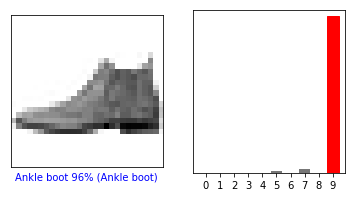

In [102]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, X_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  X_test)
plt.show()
